In [2]:
import pandas as pd
df = pd.read_csv('ibm.csv')
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
from pandas import Series, DataFrame
from patsy import dmatrices
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn import tree
from sklearn.ensemble import GradientBoostingClassifier

In [4]:
cat = []
num = []
tot = []

for x,y in df.iteritems():
    tot.append(x)

for x, y in df.iteritems():
    if y.dtypes == 'object':
        cat.append(x)

for x in tot:
    if x in cat:
        continue
    else:
        num.append(x)
cat.remove('Attrition')
cat

['BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'Over18',
 'OverTime']

In [5]:
df_cat = df[cat]
df_num = df[num]


In [6]:
df_cat = pd.get_dummies(df_cat)


In [7]:
df_tot = pd.concat([df_num, df_cat], axis=1)

In [8]:
def num(s):
    if s == 'Yes':
        s = 1
    else:
        s = 0
    return s

df['Attrition'] = df['Attrition'].map(num)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [9]:
df_tot['Attrition'] = df['Attrition']
df_tot.head()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,Over18_Y,OverTime_No,OverTime_Yes,Attrition
0,41,1102,1,2,1,1,2,94,3,2,...,0,1,0,0,0,1,1,0,1,1
1,49,279,8,1,1,2,3,61,2,2,...,1,0,0,0,1,0,1,1,0,0
2,37,1373,2,2,1,4,4,92,2,1,...,0,0,0,0,0,1,1,0,1,1
3,33,1392,3,4,1,5,4,56,3,1,...,1,0,0,0,1,0,1,0,1,0
4,27,591,2,1,1,7,1,40,3,1,...,0,0,0,0,1,0,1,1,0,0


In [10]:
formula = 'Attrition ~ ' + ' + '.join(['Q("'+x+'")' for x in df_tot.columns.values[:-1]])
print(formula)

Attrition ~ Q("Age") + Q("DailyRate") + Q("DistanceFromHome") + Q("Education") + Q("EmployeeCount") + Q("EmployeeNumber") + Q("EnvironmentSatisfaction") + Q("HourlyRate") + Q("JobInvolvement") + Q("JobLevel") + Q("JobSatisfaction") + Q("MonthlyIncome") + Q("MonthlyRate") + Q("NumCompaniesWorked") + Q("PercentSalaryHike") + Q("PerformanceRating") + Q("RelationshipSatisfaction") + Q("StandardHours") + Q("StockOptionLevel") + Q("TotalWorkingYears") + Q("TrainingTimesLastYear") + Q("WorkLifeBalance") + Q("YearsAtCompany") + Q("YearsInCurrentRole") + Q("YearsSinceLastPromotion") + Q("YearsWithCurrManager") + Q("BusinessTravel_Non-Travel") + Q("BusinessTravel_Travel_Frequently") + Q("BusinessTravel_Travel_Rarely") + Q("Department_Human Resources") + Q("Department_Research & Development") + Q("Department_Sales") + Q("EducationField_Human Resources") + Q("EducationField_Life Sciences") + Q("EducationField_Marketing") + Q("EducationField_Medical") + Q("EducationField_Other") + Q("EducationField

In [11]:
Y, X = dmatrices(formula, df_tot, return_type='dataframe')
y = Y['Attrition'].values

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [13]:
# All the models we want to test out, in one list.
model_list = [('Decision Tree', tree.DecisionTreeClassifier(criterion='entropy')),
              ('Bagging', BaggingClassifier(tree.DecisionTreeClassifier(criterion='entropy'), random_state=1)),
              ('Random Forest', RandomForestClassifier(n_estimators=4, random_state=1)),
              ('Gradient Boosting', GradientBoostingClassifier(n_estimators=50, max_depth=2, random_state=0, min_samples_leaf=3, max_leaf_nodes=6))]

In [14]:
for (name, model) in model_list:
    print('Fitting', name)
    model.fit(X_train, y_train)

Fitting Decision Tree
Fitting Bagging
Fitting Random Forest
Fitting Gradient Boosting


In [15]:
from sklearn import metrics

accuracy_train = {}
accuracy_test = {}
for (name, model) in model_list:
    prediction_train = model.predict(X_train)
    accuracy_train[name] = metrics.accuracy_score(y_train, prediction_train)
    prediction_test = model.predict(X_test)
    accuracy_test[name] = metrics.accuracy_score(y_test, prediction_test)
    
df_score = DataFrame({'Training Accuracy':accuracy_train, 'Test Accuracy':accuracy_test})
df_score

,Training Accuracy,Test Accuracy
Bagging,0.977648,0.848073
Decision Tree,1.000000,0.786848
Gradient Boosting,0.911565,0.861678
Random Forest,0.955296,0.834467


Text(0, 0.5, 'Test accuracy')

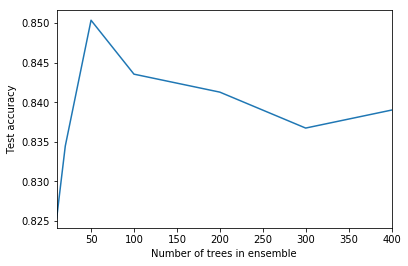

In [16]:
scores = {}
for num_trees in [10, 20, 50, 100, 200, 300, 400]:
    model = GradientBoostingClassifier(n_estimators=num_trees, max_depth=2, random_state=1)
    model.fit(X_train, y_train)
    prediction_test = model.predict(X_test)
    accuracy_test = metrics.accuracy_score(y_test, prediction_test)
    scores[num_trees] = accuracy_test
Series(scores).sort_index().plot()
xlabel('Number of trees in ensemble')
ylabel('Test accuracy')

In [17]:
from sklearn import neighbors
model = neighbors.KNeighborsClassifier(n_neighbors=5,
                                       weights='uniform',
                                       p=2)

In [18]:
model.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
from sklearn import metrics
prediction_on_training = model.predict(X_train)
print(metrics.accuracy_score(y_train, prediction_on_training))

0.8649173955296404


In [20]:
predicted_classes = model.predict(X_test)
print(metrics.accuracy_score(y_test, predicted_classes))

0.800453514739229


In [25]:
df.columns.values

array(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobRole',
       'JobSatisfaction', 'MaritalStatus', 'MonthlyIncome', 'MonthlyRate',
       'NumCompaniesWorked', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'], dtype=object)

In [92]:
rank = df['MonthlyIncome'].rank(ascending=False)

income_percentile = pd.qcut(rank, 5,
                                labels=['0-20', '20-40', '40-60',
                                        '60-80', '80-100'])
df['IncomePercentile'] = income_percentile


In [96]:
mask = (df['Gender'] != 'Female')
male = df[mask]
male

# df['Gender'].head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,IncomePercentile
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,80,1,10,3,3,10,7,1,7,40-60
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,80,0,7,3,3,0,0,0,0,80-100
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,80,1,6,3,3,2,2,2,2,60-80
5,32,0,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,80,0,8,2,2,7,7,3,6,60-80
7,30,0,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,80,1,1,2,3,1,0,0,0,80-100
8,38,0,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,80,0,10,2,3,9,7,1,8,20-40
9,36,0,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,80,2,17,3,2,7,7,7,7,40-60
10,35,0,Travel_Rarely,809,Research & Development,16,3,Medical,1,14,...,80,1,6,5,3,5,4,0,3,80-100
12,31,0,Travel_Rarely,670,Research & Development,26,1,Life Sciences,1,16,...,80,1,5,1,2,5,2,4,3,60-80
13,34,0,Travel_Rarely,1346,Research & Development,19,2,Medical,1,18,...,80,1,3,2,3,2,2,1,2,80-100


In [54]:
df[['MonthlyIncome', 'IncomePercentile']].head(10)

,MonthlyIncome,IncomePercentile
0,5993,20-40
1,5130,40-60
2,2090,80-100
3,2909,60-80
4,3468,60-80
5,3068,60-80
6,2670,80-100
7,2693,80-100
8,9526,20-40
9,5237,40-60


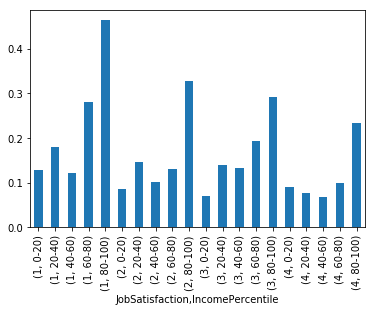

In [83]:
df.groupby(['JobSatisfaction', 'IncomePercentile'])[['Attrition']].apply(lambda x: x['Attrition'].sum()/len(x)).plot(kind='bar')

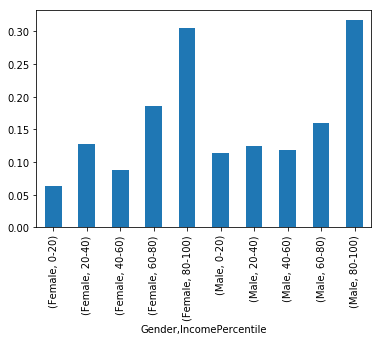

In [79]:
import seaborn as sns

df.groupby(['Gender', 'IncomePercentile'])[['Attrition']].apply(lambda x: x['Attrition'].sum()/len(x)).plot(kind='bar')

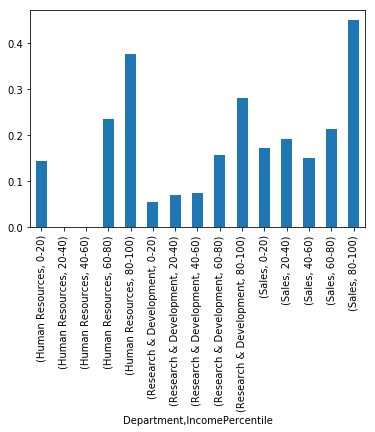

In [65]:
df.groupby(['Department', 'IncomePercentile'])[['Attrition']].apply(lambda x: x['Attrition'].sum()/len(x)).plot(kind='bar')

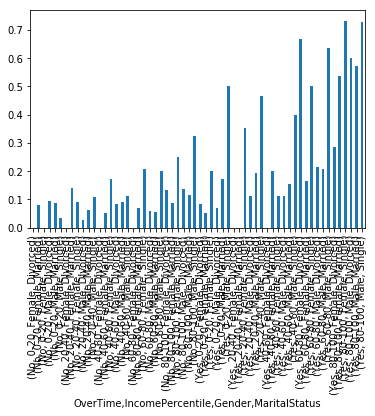

In [86]:
df.groupby(['OverTime', 'IncomePercentile','Gender', 'MaritalStatus'])[['Attrition']].apply(lambda x: x['Attrition'].sum()/len(x)).plot(kind='bar')

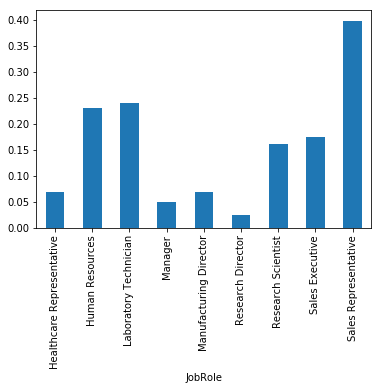

In [68]:
df.groupby(['JobRole'])[['Attrition']].apply(lambda x: x['Attrition'].sum()/len(x)).plot(kind='bar')

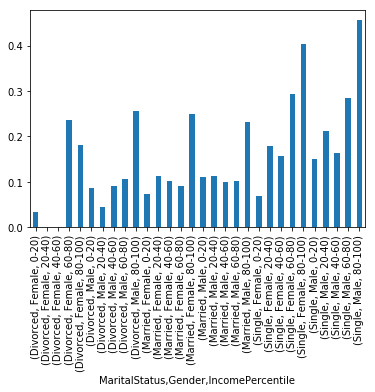

In [85]:
df.groupby(['MaritalStatus','Gender', 'IncomePercentile'])[['Attrition']].apply(lambda x: x['Attrition'].sum()/len(x)).plot(kind='bar')

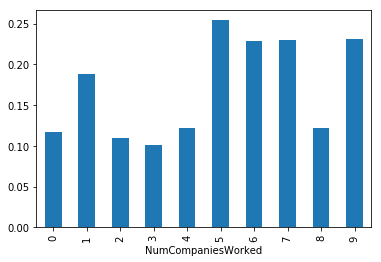

In [73]:
df.groupby(['NumCompaniesWorked'])[['Attrition']].apply(lambda x: x['Attrition'].sum()/len(x)).plot(kind='bar')

In [99]:
df_tot.columns.values

array(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction',
       'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'BusinessTravel_Non-Travel',
       'BusinessTravel_Travel_Frequently', 'BusinessTravel_Travel_Rarely',
       'Department_Human Resources', 'Department_Research & Development',
       'Department_Sales', 'EducationField_Human Resources',
       'EducationField_Life Sciences', 'EducationField_Marketing',
       'EducationField_Medical', 'EducationField_Other',
       'EducationField_Technical Degree', 'Gender_Female', 'Gender_Male',
     